In [17]:
import latticeproteins as lp
# need to use myenv2 python -m ipykernel install --user --name myenv --display-name "Python (myenv)"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
seq_length = 20
temperature = 1.0
lattice = lp.LatticeThermodynamics.from_length(seq_length, 1.0)

In [19]:
# important commands
seq = lp.random_sequence(seq_length)
print(seq)
print("Energy of native conformation: %f" % lattice.nativeE(seq)) 
print("stability of native conformation: %f" % lattice.stability(seq)) 
print("fraction folded: %f" % lattice.fracfolded(seq))

['V', 'F', 'D', 'M', 'N', 'I', 'G', 'C', 'A', 'E', 'H', 'P', 'R', 'A', 'Q', 'F', 'T', 'H', 'Q', 'P']
Energy of native conformation: -41.710000
stability of native conformation: 3.994071
fraction folded: 0.018091


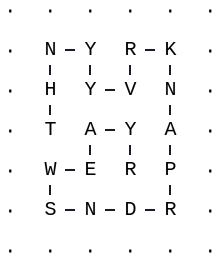

In [4]:
conf = lattice.native_conf(seq)
lp.draw.in_notebook(seq, conf)

In [5]:
# see how many random sequences it takes to get to a frac folded of 0.7
# save the first protein that has a frac fold of 0.7
i = 0
max_fracfolded = 0
while max_fracfolded < 0.7:
    seq = lp.random_sequence(seq_length)
    fracfold = lattice.fracfolded(seq)
    if fracfold > max_fracfolded:
        max_fracfolded = fracfold
    i += 1

KeyboardInterrupt: 

In [6]:
# can we make proteins with a frac fold of 0.7 by iteratively mutating?
# yes -- this only takes 4 iterations
seq2 = lp.random_sequence(seq_length)
fracfold = lattice.fracfolded(seq2)
iterations = 0
while fracfold < 0.7:
    iterations += 1
    candidates = lp.sequences.n_mutants(seq2, 1, 100)  # consider 100 proteins
    candidates_frac = [lattice.fracfolded(x) for x in candidates]
    max_index = np.argmax(candidates_frac)
    seq2 = candidates[max_index]
    fracfold = candidates_frac[max_index]
iterations

KeyboardInterrupt: 

In [20]:
seq2 = ['G', 'C', 'F', 'C', 'M', 'K', 'C', 'G', 'N', 'G', 'C', 'K', 'F', 'K', 'K', 'F', 'K', 'F', 'K', 'W']

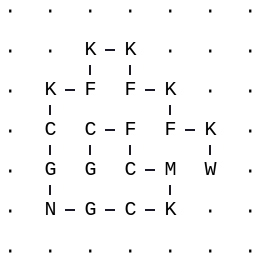

In [21]:
conf = lattice.native_conf(seq2)
lp.draw.in_notebook(seq2, conf)

In [22]:
# make lots of mutations and look at their fitness
# fitness = the percentage of folded 
df_mutations = pd.DataFrame({'nmut': [0], 'fitness': [lattice.fracfolded(seq2)]})
for nmut in range(1,10):  # consider between 1 and 10 mutations
    for mut_seq in lp.sequences.n_mutants(seq2, nmut, 30):  # consider 30 proteins
        df_mutations = df_mutations.append({'nmut': nmut, 'fitness': lattice.fracfolded(mut_seq)}, ignore_index=True)

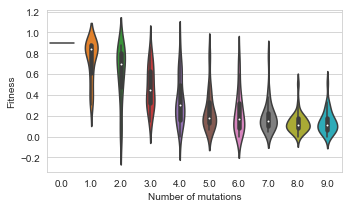

In [24]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("../figures/fig4b.pdf")
plt.figure(figsize=[5,3])
sns.set_style("whitegrid")
sns.violinplot(x="nmut", y="fitness", data=df_mutations)
plt.xlabel("Number of mutations")
plt.ylabel("Fitness")
plt.tight_layout()
pp.savefig()
pp.close()

In [79]:
lattice.fracfolded(seq2)

0.7790687597623936